# Population Dynamics

## Important concepts

**Population ($N$)**: a group of individuals of one species.

**Population Dynamics ($dN/dt$)**: How a population changes over time.

--------------------------------------------------------------------------------------------------------------------------

## Importance 

- Wildlife conservation.
- Outbreak control.
- Urban planning.
- Food production and resource management. 

-----------------------------------------------------------------------------------------------------------------------------

## **Exponential Growth**

![alt text](../figures/exponential_model.1.png)

### Model assumptions

- **Simplest model** to describe the growth of a single population
- The population is **homogenous**
- The population is **isolated**
- The habitat is **invariant**
- The population is **very large**

### How do we model exponential growth?

$$\frac{dN}{dt} = r \cdot N$$
$$N(t) = N_0 \cdot e^{r \cdot t}$$

$N_0$ is the initial population; $r$ is the growth rate; Malthus parameter; $t$ is time. 

In [1]:
import ipywidgets
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def model_exponential(No,r):
    t  = np.linspace(0,5,51)
    N = No*np.exp(r*t)
    plt.plot(t,N)
    plt.ylabel('Population (#)')
    plt.xlabel('Time (hours)')
    #print(N)
    #print(t)

ipywidgets.interact(model_exponential,No=(2,100,1),r=(0.1,5,0.01))

interactive(children=(IntSlider(value=51, description='No', min=2), FloatSlider(value=2.5500000000000003, desc…

<function __main__.model_exponential(No, r)>

## **Exponential Growth with migration**

### Model assumptions

- The population is not isolated (no immigration nor emigration).

### How do we model exponential growth with migration?

$$\frac{dN}{dt} = r \cdot N ± m$$
$$N(t) = \left(N_0 + \frac{m}{r}\right) \cdot e^{(r\cdot t)} - \frac{m}{r}$$

$N_0$ is the initial population; $r$ is the growth rate; Malthus parameter; $t$ is time; $m$ is emigration or immigration.  

In [3]:
def model_exponential_exo(No,r,m):
    t  = np.linspace(0,5,51)
    N = (No+(m/r))*np.exp(r*t)-(m/r)
    plt.plot(t,N)
    plt.ylabel('Population (#)')
    plt.xlabel('Time (hours)')
    #print(N)
    #print(t)

ipywidgets.interact(model_exponential_exo,No=(2,100,1),r=(0.1,5,0.01),m=(-10,10,1))

interactive(children=(IntSlider(value=51, description='No', min=2), FloatSlider(value=2.5500000000000003, desc…

<function __main__.model_exponential_exo(No, r, m)>

## **Exercise 1: Determine the growth rate for the following population**

Using an exponential growth model, we can model the US population from 1790 to 2000. The goal of this activity is to determine the appropriate growth rate parameter to model the data plotted in the following table 1:

**Table 1**:U.S.A. population (Iannelli, M., & Pugliese, A. (2014))
| Year | Individuals (x 1000) |
|:---------|:--------:|
|  1790   |  3929   |
|  1800   |  5308   |
|  1810   |  7240   |
|  1820   |  9638   |
|  1830   |  12861   | 
|  1840   |  17064   |
|  1850   |  23192   |
|  1860   |  31443   |
|  1870   |  38558   |
|  1880   |  50189   | 
|  1890   |  62980   |
|  1900   |  76212   |
|  1910   |  92228   |
|  1920   |  106021   |
|  1930   |  123203   | 
|  1940   |  132165   |
|  1950   |  151326   |
|  1960   |  179323   |
|  1970   |  203302   |
|  1980   |  226456   |
|  1990   |  255712   |
|  2000   |  285003   ||  2000   |  285003   |1   | 

In [4]:
def model_US_pop(r):
    t   = np.linspace(1790,2000,22)
    obs = 1000*np.array([3929, 5308, 7240,9638,12861,17064,23192,31443,38558,50189,62980,76212,92228,106021,
                         123203,132165,151326,179323,203302,226456,255712,285003])
    No  = 3929*1000
    N   = No*np.exp(r*(t-1790))
    plt.plot(t,N,label="Simulations")
    plt.plot(t,obs,"o",label="Observations")
    plt.ylabel('Population (#)')
    plt.xlabel('Time (Years)')
    plt.legend()
    plt.show()

ipywidgets.interact(model_US_pop,r=(0.001,0.050,0.001))

interactive(children=(FloatSlider(value=0.025, description='r', max=0.05, min=0.001, step=0.001), Output()), _…

<function __main__.model_US_pop(r)>

--------------------------------------------------------------------------------------------------------------------------

## **Logistic Model**

![alt text](../figures/logistic_model.1.png)

### Model assumptions

- Population growth is **limited** by factors such as **food** or **space**.
- Population grows more slowly as it gets larger (**density-dependent**).
- This population size is called the **carrying capacity** “K” (maximum population size that a particular environment can support). 

### How do we model logistic growth?

$$\frac{dN}{dt} = r \cdot N \cdot \left(\frac{K-N}{K}\right)$$
$$N(t) = \frac{K \cdot N_0}{N_0 + (K - N_0) \cdot e^{(-r\cdot t)}}$$

$N_0$ is the initial population; $r$ is the growth rate; Malthus parameter; $t$ is time; $K$ is the carrying capacity.  

In [5]:
def model_logistic(No,r,K):
    t  = np.linspace(0,100,101)
    N = (K*No)/(No+(K-No)*np.exp(-r*t))
    plt.plot(t,N)
    plt.ylabel('Population (#)')
    plt.xlabel('Time (hours)')
    #print(N)
    #print(t)

ipywidgets.interact(model_logistic,No=(2,100,1),r=(0.1,5,0.01),K=(100,100000,100))

interactive(children=(IntSlider(value=51, description='No', min=2), FloatSlider(value=2.5500000000000003, desc…

<function __main__.model_logistic(No, r, K)>

-------------------------------------------------------------------------------------------------------------------------

## **Predator-Prey model**

### Model assumptions

- Basic mechanism for **two-species dynamics**.
- **Predator** species are totally **dependent** on a **single prey** species as a food source.
- There is **no threat** to the prey other than the specific predator.

![alt text](../figures/prey_predator.1.png)

### How do we model Predator-Prey dynamics?

$$\frac{dN}{dt} = \beta_N \cdot N - \mu_N \cdot P \cdot N$$
$$\frac{dP}{dt} = \beta_P \cdot P \cdot N - \mu_P \cdot P$$

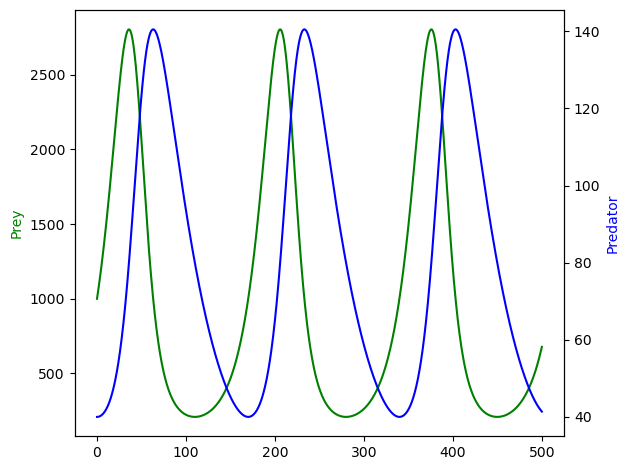

Text(0.5, 0, 'Population (Prey)')

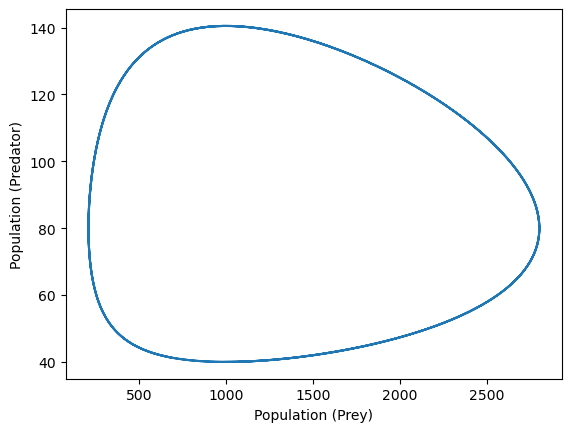

In [67]:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    p  = {"beta_N":0.08,"mu_N":0.001,"beta_P":0.00002,"mu_P":0.02} # Parameters
    P0 = [1000,40] # Initial population sizes
    #plt.figure(2)
    def pp_1(P,t,p):
        dPdt1 = p["beta_N"]*P[0] - p["mu_N"]*P[0]*P[1]
        dPdt2 = p["beta_P"]*P[0]*P[1] - p["mu_P"]*P[1]
        dPdt  = [dPdt1,dPdt2]
        return dPdt
    t  = np.linspace(0,500,2000)
    y = odeint(pp_1,P0,t,args=(p,))
    ax1.plot(t,y[:,0],label="Prey",color='g')
    ax2.plot(t,y[:,1],label="Predator",color='b')
    ax1.set_ylabel('Prey', color='g')
    ax2.set_ylabel('Predator', color='b')
    plt.tight_layout()
    plt.show()

    plt.plot(y[:,0],y[:,1])
    plt.ylabel('Population (Predator)')
    plt.xlabel('Population (Prey)')

In [6]:
def model_PP(beta_N,mu_N,beta_P,mu_P,N0,P0):
    p  = {"beta_N":beta_N,"mu_N":mu_N,"beta_P":beta_P,"mu_P":mu_P} # Parameters
    P0 = [N0,P0] # Initial population sizes
    #plt.figure(2)
    def pp_1(P,t,p):
        dPdt1 = p["beta_N"]*P[0] - p["mu_N"]*P[0]*P[1]
        dPdt2 = p["beta_P"]*P[0]*P[1] - p["mu_P"]*P[1]
        dPdt  = [dPdt1,dPdt2]
        return dPdt
    t  = np.linspace(0,500,2000)
    y = odeint(pp_1,P0,t,args=(p,))
    plt.plot(t,y[:,0],label="Prey")
    plt.plot(t,y[:,1],label="Predator")
    plt.ylabel('Population (#)')
    plt.xlabel('Time (Years)')
    plt.tight_layout()
    plt.legend()
    plt.show()
    
ipywidgets.interact(model_PP,beta_N=(0.01,0.15,0.01),mu_N=(0.001,0.01,0.001),beta_P=(0.00001,0.00003,0.00001),mu_P=(0.01,0.05,0.01),N0=(500,1000,50),P0=(5,50,1))

interactive(children=(FloatSlider(value=0.06999999999999999, description='beta_N', max=0.15, min=0.01, step=0.…

<function __main__.model_PP(beta_N, mu_N, beta_P, mu_P, N0, P0)>